### Carga de librerias

In [22]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.legend_handler import HandlerBase
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
#import mungo as msno

%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import kds

In [2]:
df_cros = pd.read_csv("../data/raw/train.csv").set_index("id")
df_cros = df_cros.rename(columns={"Response":"Compraron"})

In [3]:
#Usar la etiqueta proporcionada en el conjunto de datos para convertir una columna discreta en una columna categórica
df_cros["Driving_License"] = df_cros["Driving_License"].replace({0:"No",1:"Yes"})
df_cros["Previously_Insured"] = df_cros["Previously_Insured"].replace({0:"No",1:"Yes"})
df_cros["Compraron"] = df_cros["Compraron"].replace({0:"No",1:"Yes"})

### Analisis de variables categoricas vs variable objetivo (compraron)

In [4]:
# Creando una función para visualización
def pie_bar_plot(df, col, hue):
    plt.figure(figsize=(10, 4))
    
    # Extraer recuentos de valores para la columna especificada
    col_counts = df[col].value_counts().sort_index()
    
    # Primera subtrama: gráfico circular
    plt.subplot(1, 2, 1) 
    ax1 = col_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=10, pad=11)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90, 
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # Segunda subtrama: diagrama de barras
    plt.subplot(1, 2, 2)
    new_df = df[df[hue] == 'Yes']
    value_1 = col_counts
    value_2 = new_df[col].value_counts().sort_index()  # Ordenar los valores en el mismo orden.
    ax2 = np.round((value_2 / value_1) * 100, 1).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')
    plt.title(f"Employee Opting for Insurance by {col}", fontweight="black", size=10, pad=11)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(float(ax2[index])) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()

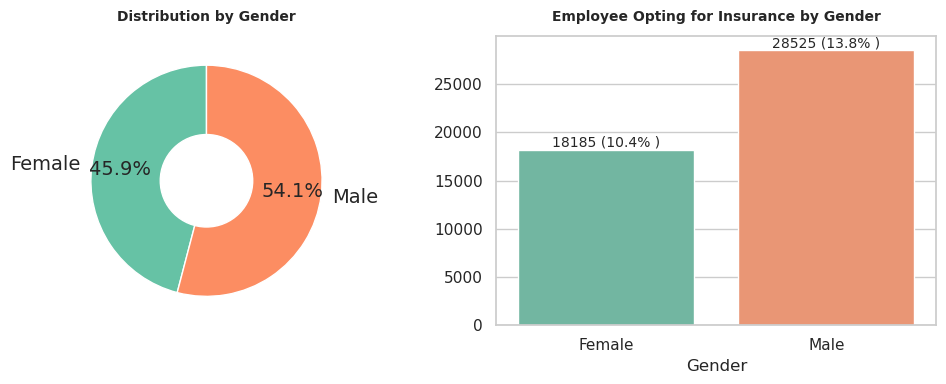

In [5]:
#Análisis del seguro de vehículos de los clientes por género
pie_bar_plot(df_cros, 'Gender', 'Compraron')

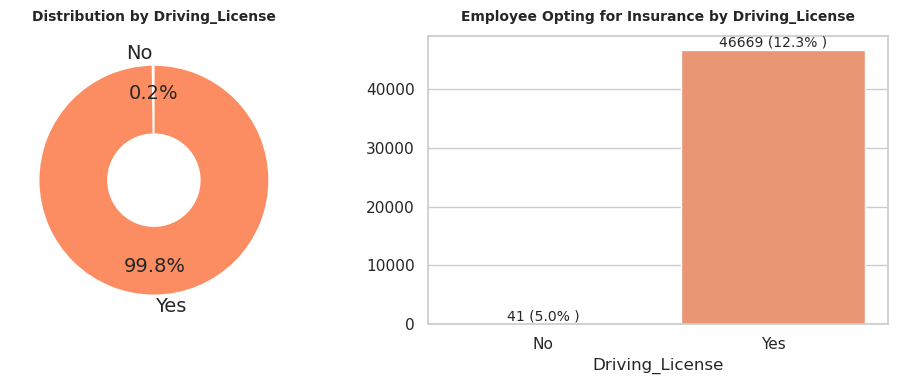

In [7]:
pie_bar_plot(df_cros, 'Driving_License', 'Compraron')

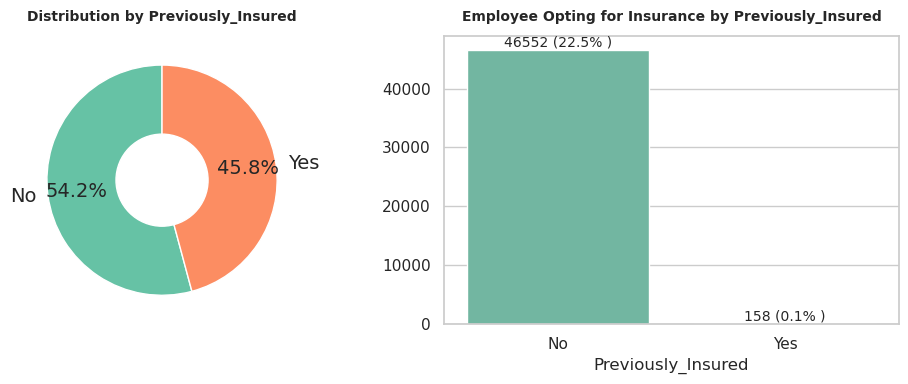

In [8]:
pie_bar_plot(df_cros, 'Previously_Insured', 'Compraron')

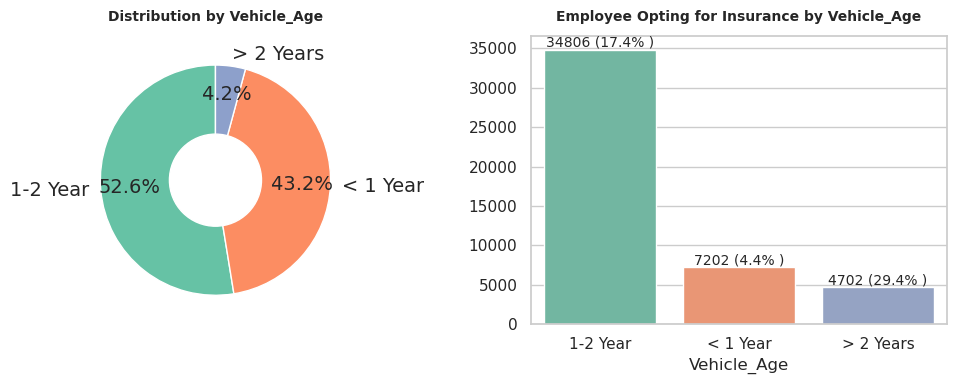

In [9]:
pie_bar_plot(df_cros, 'Vehicle_Age', 'Compraron')

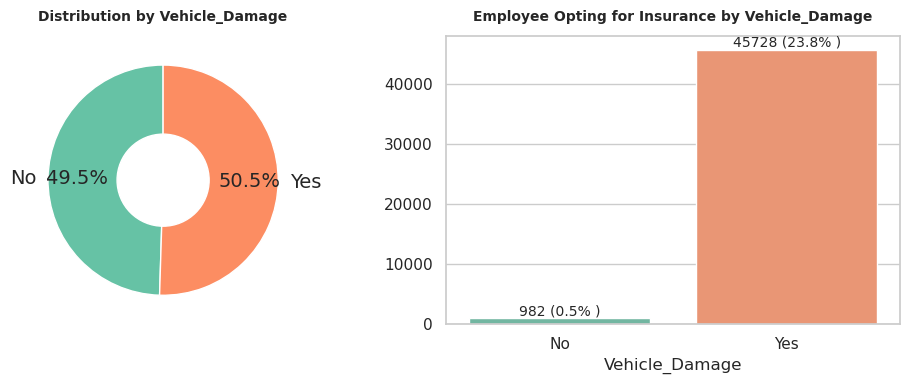

In [11]:
pie_bar_plot(df_cros, 'Vehicle_Damage', 'Compraron')

### Analisis de variables numericas vs variable objetivo (compraron)

In [12]:
def dist_box_plot(df, col, hue):   
    plt.rcParams['figure.figsize'] = (8, 4)
    sns.boxplot(x=df[col],y=df[hue], palette = 'viridis')
    plt.title(f'Relación entre {col} y {hue}', fontsize = 20)
    plt.show()

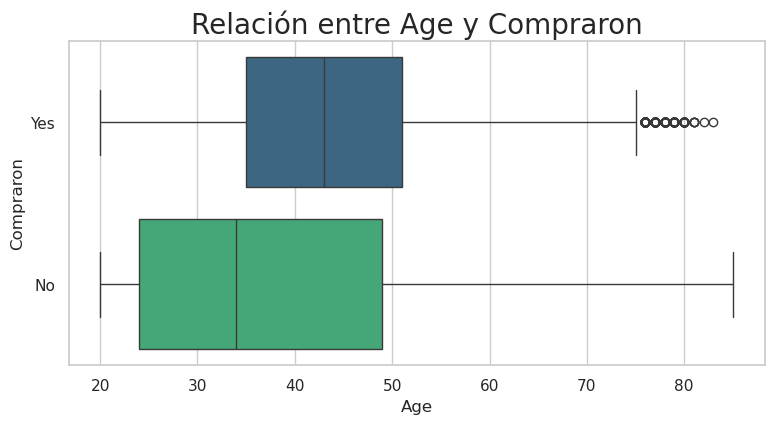

In [13]:
dist_box_plot(df_cros, 'Age', 'Compraron')

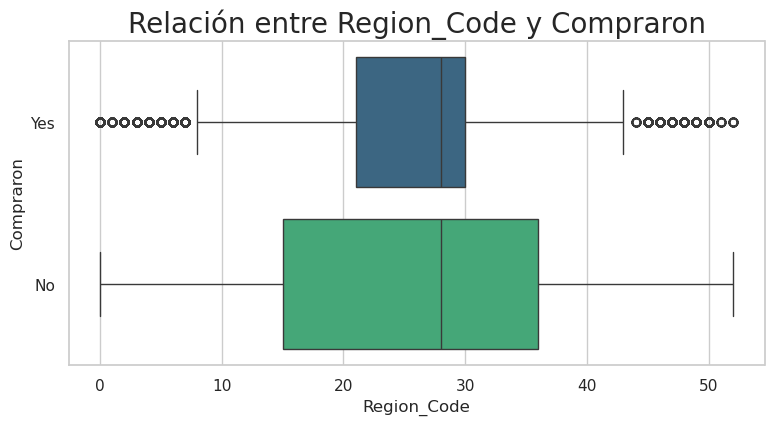

In [14]:
dist_box_plot(df_cros, 'Region_Code', 'Compraron')

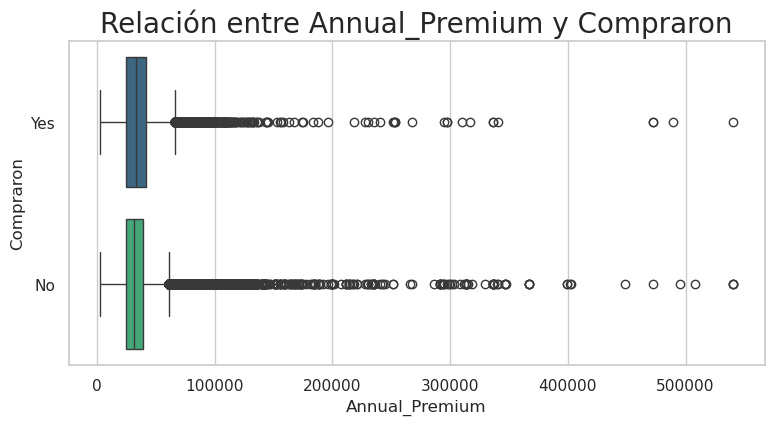

In [15]:
dist_box_plot(df_cros, 'Annual_Premium', 'Compraron')

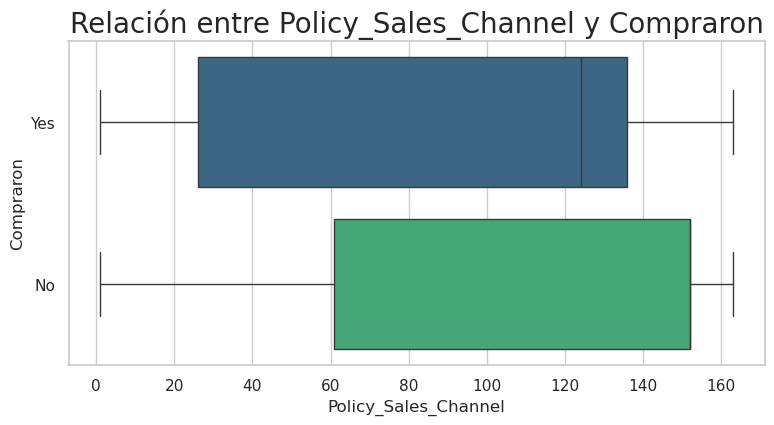

In [17]:
dist_box_plot(df_cros, 'Policy_Sales_Channel', 'Compraron')

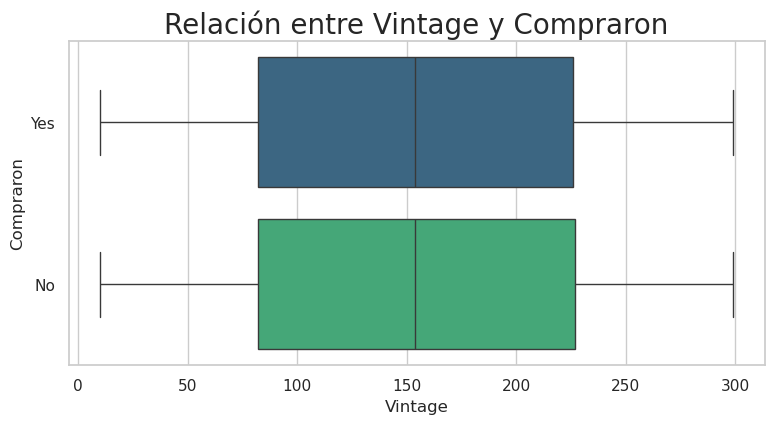

In [18]:
dist_box_plot(df_cros, 'Vintage', 'Compraron')

### Encoding

In [19]:
#Codificar la variable de nuevo a su forma original
#Reemplazar 0 con 'No' y 1 con 'Sí' en 'Permiso_de_conducción', 'Asegurado_previamente' y 'Respuesta'
df_cros["Driving_License"] = df_cros["Driving_License"].replace({"No":0,"Yes":1})
df_cros["Previously_Insured"] = df_cros["Previously_Insured"].replace({"No":0,"Yes":1})
df_cros["Compraron"] = df_cros["Compraron"].replace({"No":0,"Yes":1})

In [20]:
df_cros.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Compraron
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [23]:
#Label Encoding
le = LabelEncoder()

In [24]:
df_cros['Gender'] = le.fit_transform(df_cros['Gender'])
df_cros['Vehicle_Damage'] = le.fit_transform(df_cros['Vehicle_Damage'])
df_cros.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Compraron
id,,,,,,,,,,,
1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [25]:
#Ordinal Encoding
df_cros["Vehicle_Age"] = df_cros["Vehicle_Age"].replace({"< 1 Year":0,"1-2 Year":1, "> 2 Years":2})
df_cros.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Compraron
id,,,,,,,,,,,
1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


### Correlacion

In [ ]:
Age
Region_Code
Annual_Premium
Policy_Sales_Channel
Vintage

In [ ]:
## Matriz de corelaciones
cor_mat = df_cros[['Age','Region_Code','Annual_Premium','BILL_AMT1','BILL_AMT2','PAY_AMT1','PAY_AMT2']].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)